In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams.update({'font.size': 12})  # default font size 14

In [46]:
interseismic_coupling = pd.read_excel('interseismic_coupling_catalog.xlsx')
print(interseismic_coupling.head())

       Lon      Lat    Depth  Coupling                    Source  \
0  94.7980  27.7612  -1.2768    0.5332  Stevens and Avouac, 2015   
1  94.7171  27.8731  -3.8305    0.5248  Stevens and Avouac, 2015   
2  94.6360  27.9849  -6.3841    0.5274  Stevens and Avouac, 2015   
3  94.5548  28.0967  -8.9378    0.5189  Stevens and Avouac, 2015   
4  94.4734  28.2085 -11.4914    0.5045  Stevens and Avouac, 2015   

  Subduction zone  
0        Himalaya  
1        Himalaya  
2        Himalaya  
3        Himalaya  
4        Himalaya  


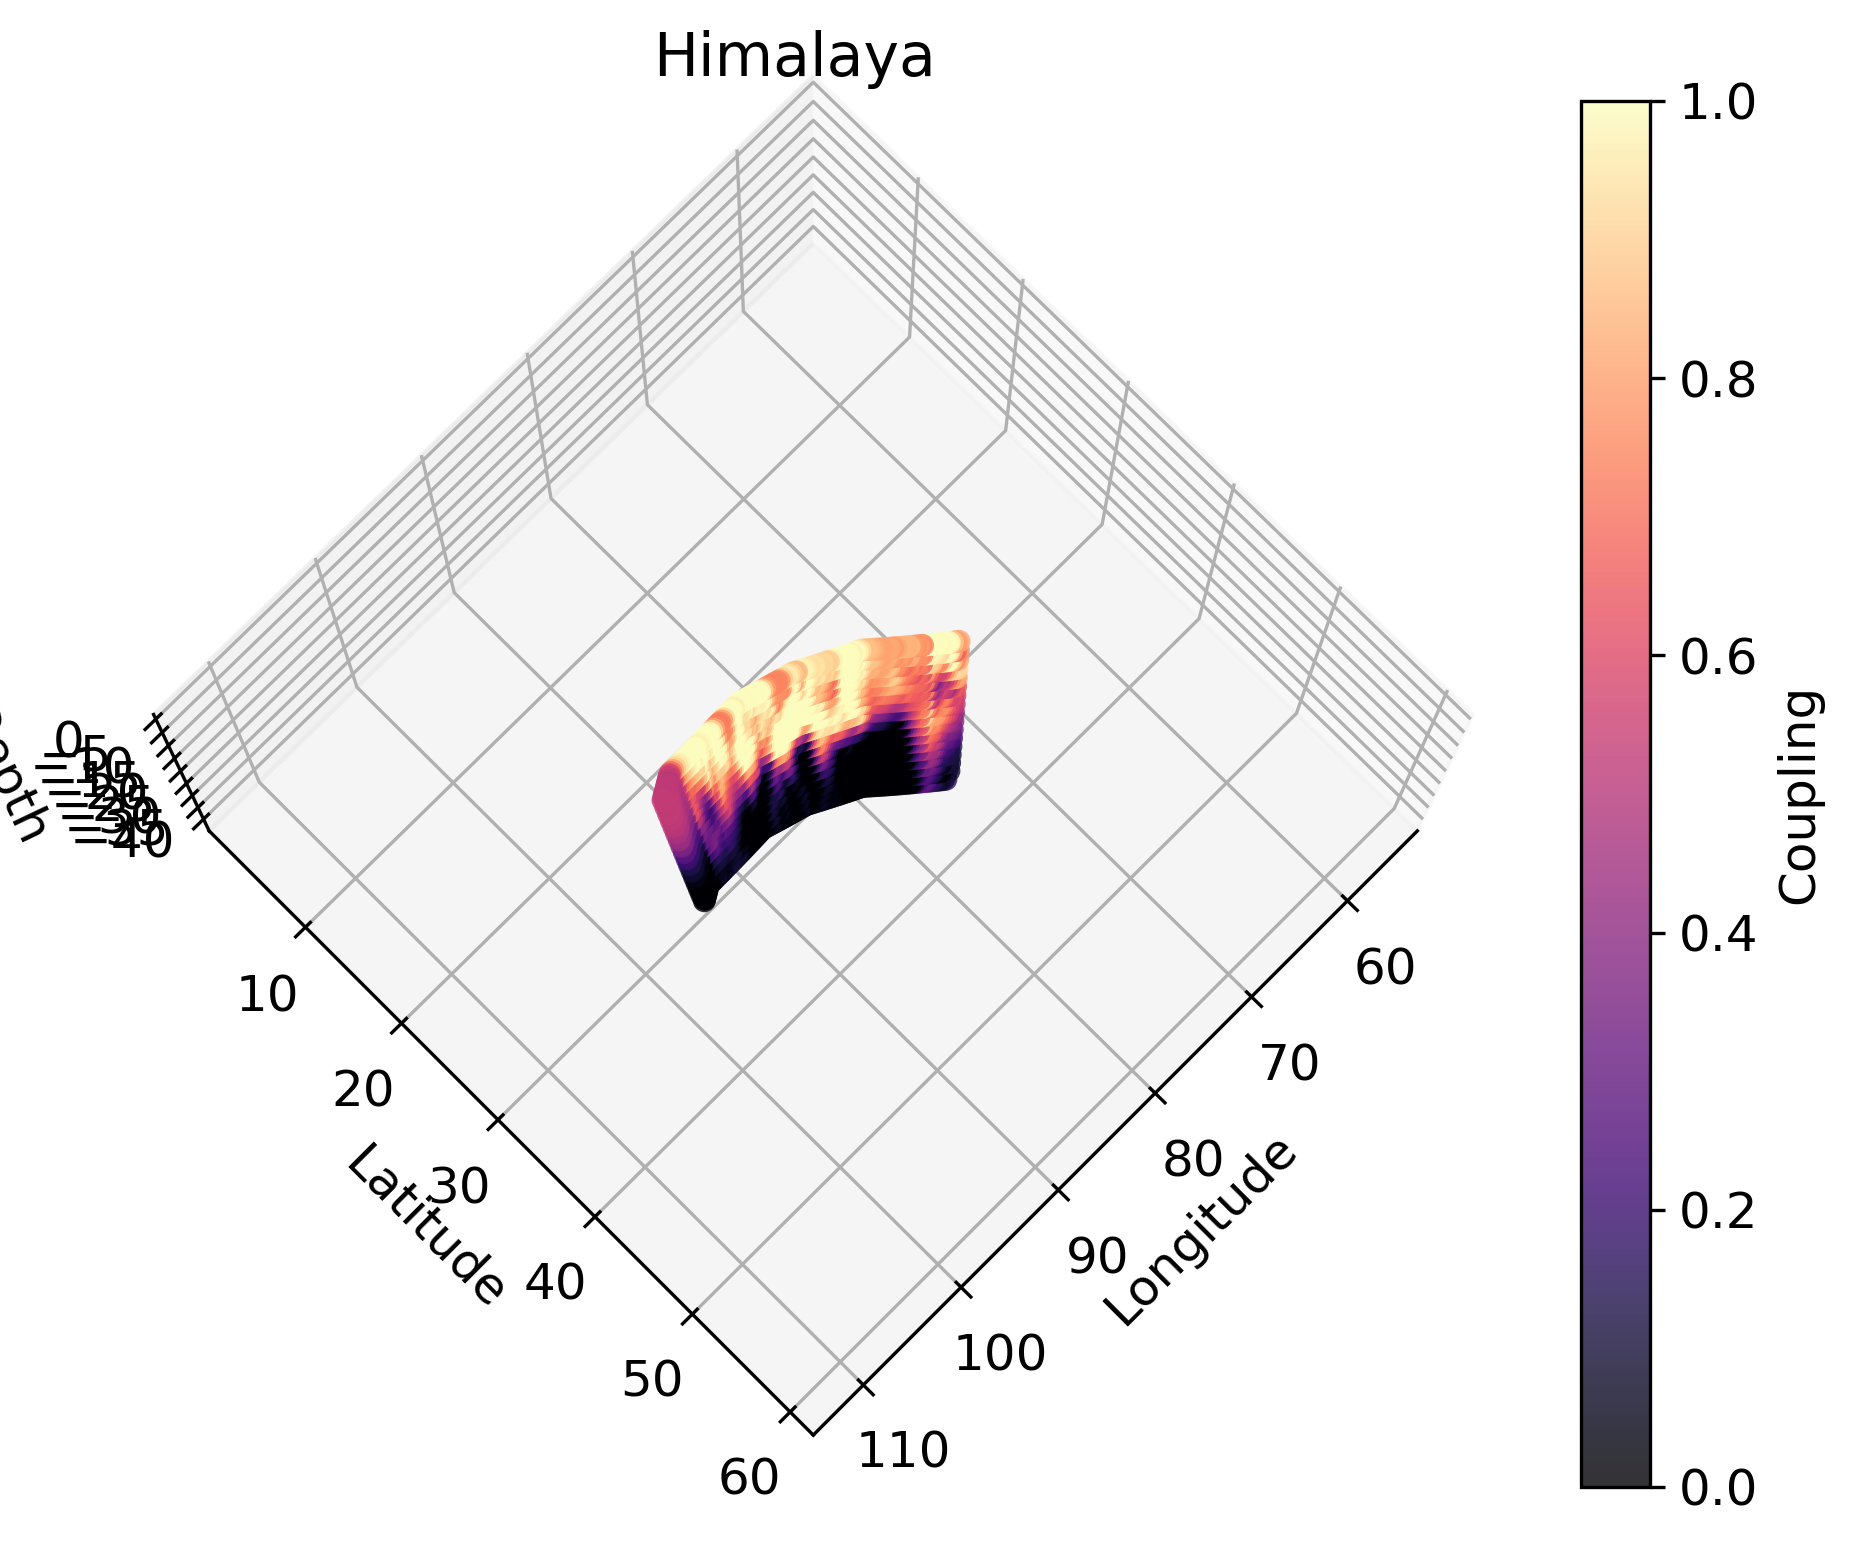

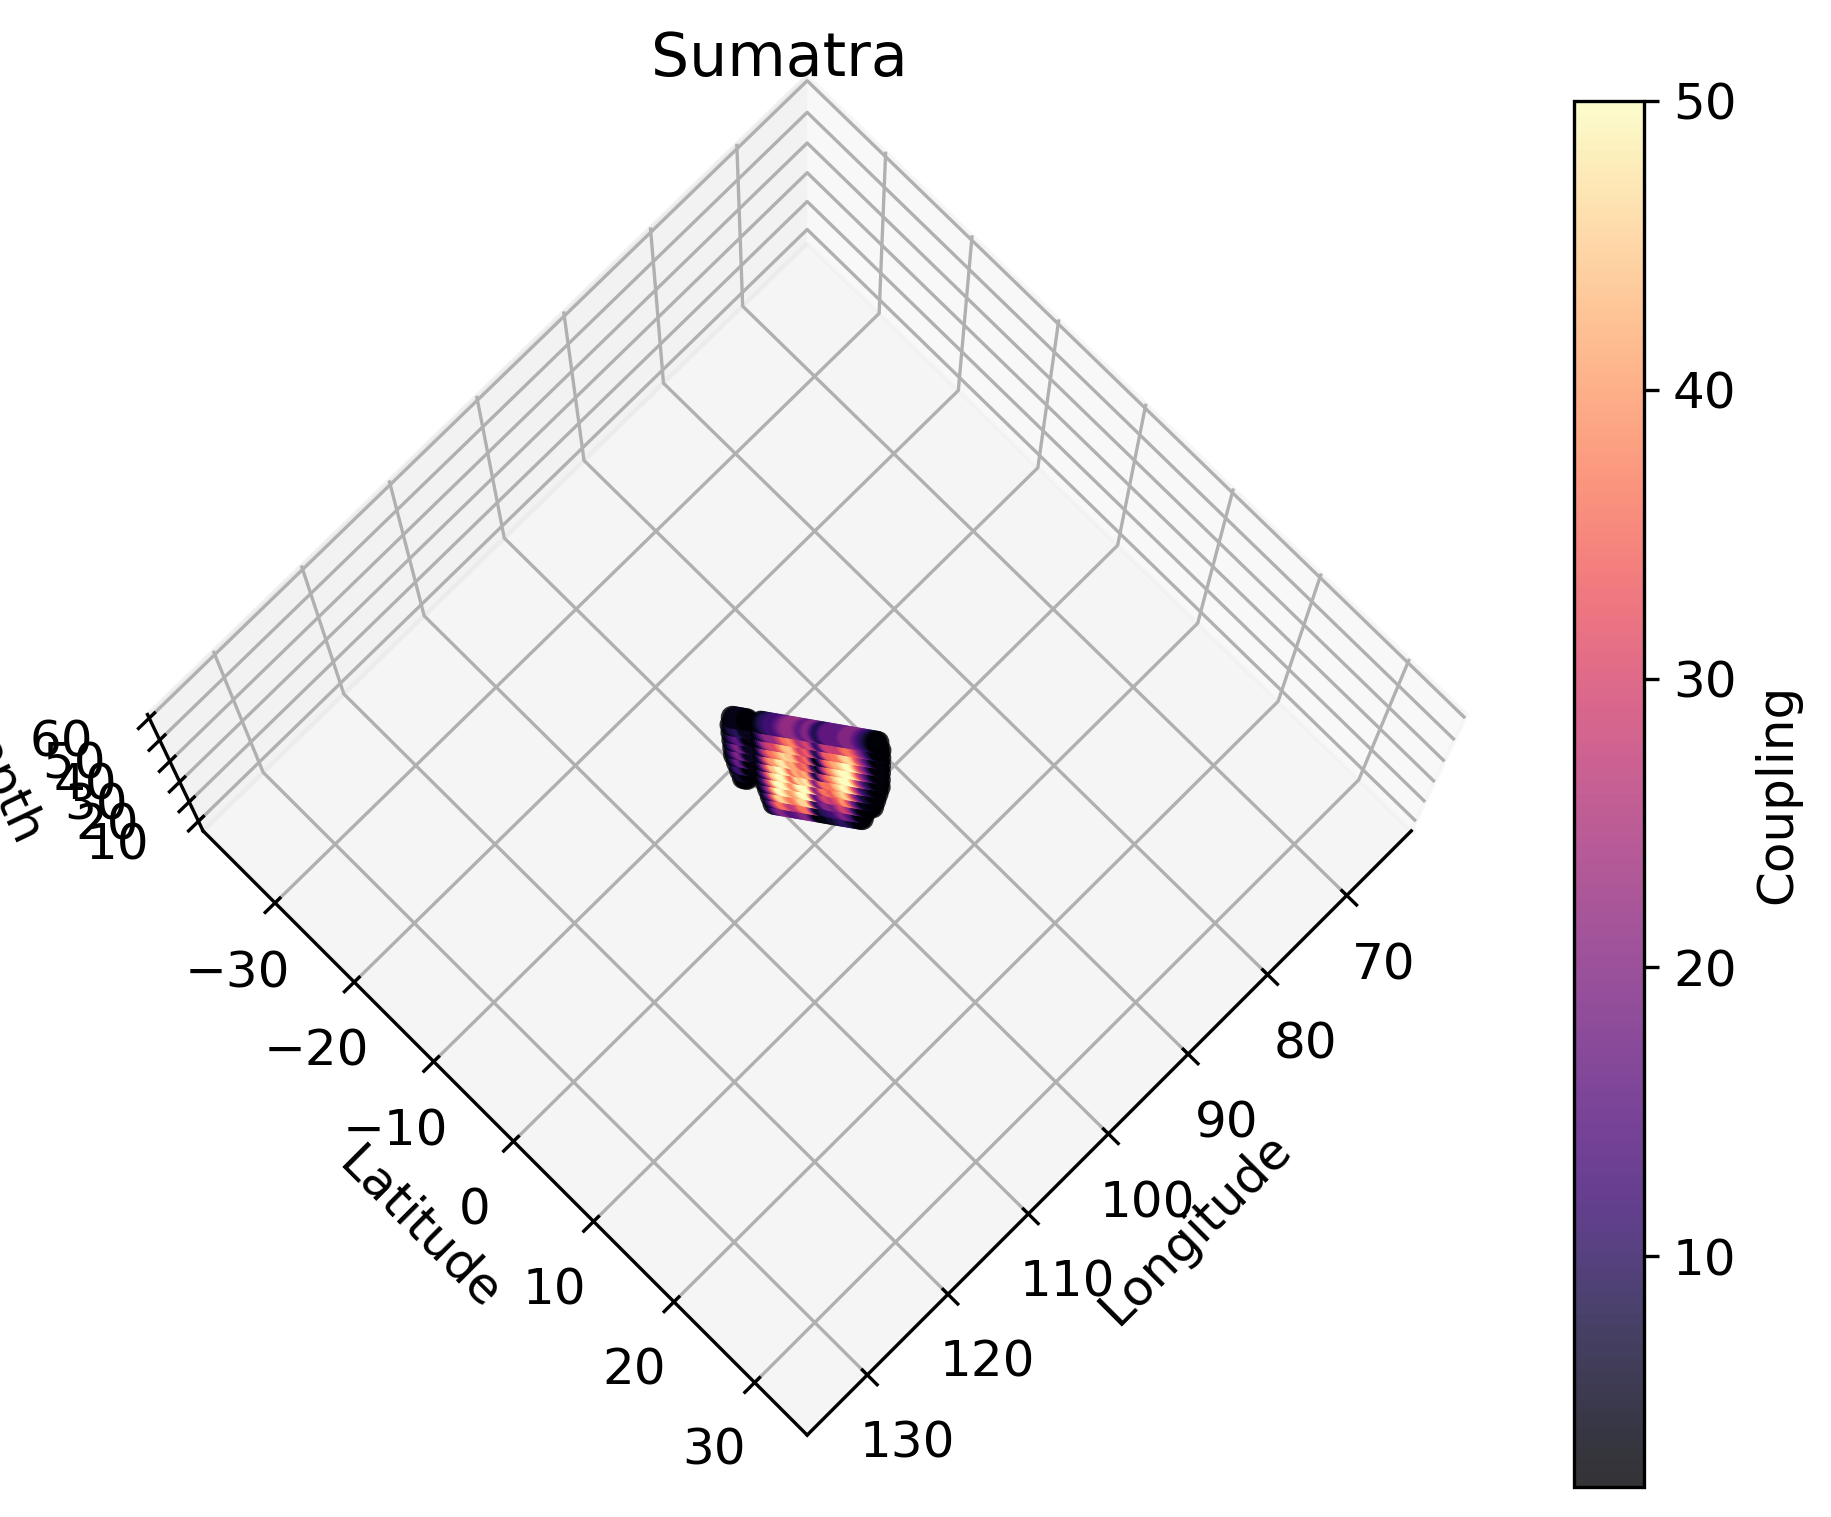

In [47]:
# Get unique categories in the 'Subduction zone' column
subduction_zones = interseismic_coupling['Subduction zone'].unique()


# Loop through each subduction zone and create scatter plots
for zone in subduction_zones:
    subset = interseismic_coupling[interseismic_coupling['Subduction zone'] == zone]
   
    # Create a 3D scatter plot
    fig = plt.figure(figsize=(8, 6),dpi=300)
    ax = fig.add_subplot(111, projection='3d')
    
    # Scatter plot
    scatter = ax.scatter(
        subset['Lon'],
        subset['Lat'],
        subset['Depth'],
        c=subset['Coupling'],
        cmap='magma',  
        marker='o',
        s=20,  # Marker size
        alpha=0.8  # Transparency
    )

    # Set labels for each axis
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_zlabel('Depth')
    ax.axis('equal')
    ax.set_title(zone)

    # Set colorbar
    cbar = fig.colorbar(scatter,label='Coupling')

    # Adjust the viewing angle based on the number of values in Longitude and Latitude
    if len(subset['Lon']) > len(subset['Lat']):
        ax.view_init(elev=80, azim=0)  # Focus on Longitude
    else:
        ax.view_init(elev=80, azim=45)  # Focus on Latitude

   